# Modelo de clasificación usando `DecisionTreeClassifier`

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene la explicación del uso del árbol de decisión para un problema de clasificación.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

## Cargando Dataset

In [110]:
!wget https://www.dropbox.com/s/lus9jhalh6j65qt/diabetes.csv

--2025-05-03 22:32:30--  https://www.dropbox.com/s/lus9jhalh6j65qt/diabetes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/6ngpmrhofnz5fqf86efv5/diabetes.csv?rlkey=qndgwm5jvy70qf02wzlcbac11 [following]
--2025-05-03 22:32:30--  https://www.dropbox.com/scl/fi/6ngpmrhofnz5fqf86efv5/diabetes.csv?rlkey=qndgwm5jvy70qf02wzlcbac11
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc423b68f4fd021b5e560131aaaa.dl.dropboxusercontent.com/cd/0/inline/CpBSYozS2pZqIDM5xyaXHZxLNYvpSa70mkRpffjfSpalNgE82aDTVWQ_2Xvhol1zVqJegYI68CdgaQGor0Wb2KP3dGMhm1yXAxLnN-4Pa6DmYySTRtN2vtMiuCTPNu1i_t65yFXqxagr3z_lPcd9ld1R/file# [following]
--2025-05-03 22:32:31--  https://uc423b68f4fd021b5e560131aaaa.dl.dropboxusercontent.com/cd/0/inline/C

In [111]:
dataset = pd.read_csv("diabetes.csv")

In [112]:
dataset["Outcome"].unique()                      # Unique values of Species

array([1, 0])

In [113]:
diabetes_features = dataset.iloc[:,:-1]
diabetes_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Separando entradas y etiquetas

In [114]:
X = dataset.iloc[:,:-1]
y = dataset["Outcome"]

## Separando datos entrenamiento y test

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29, stratify=y)                                    # 80:20

In [116]:
X_test.shape

(154, 8)

## Entrenamiento del árbol de decisión

#### Usando Índice de  Gini

In [117]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  max_depth = 3,
                                  min_samples_leaf = 20,
                                  random_state = 29)

In [118]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=29)

#### Usando Entropía

In [119]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                  max_depth = 3,
                                  min_samples_leaf = 20,
                                  random_state = 29)

In [120]:
clf_entropy.fit(X_train, y_train)                                    # Training the model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       random_state=29)

## Evaluando el modelo

#### Indice de Gini

In [121]:
y_pred_gini = clf_gini.predict(X_test)

In [122]:
print ("Accuracy : {}".format(accuracy_score(y_test,y_pred_gini)*100))
print ("Report\n",  classification_report(y_test, y_pred_gini))

Accuracy : 75.32467532467533
Report
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       100
           1       0.79      0.41      0.54        54

    accuracy                           0.75       154
   macro avg       0.77      0.67      0.68       154
weighted avg       0.76      0.75      0.73       154



#### Entropía

In [123]:
y_pred_entropy = clf_entropy.predict(X_test)                                # Performing Prediction on test input

In [124]:
print ("Accuracy : {}".format(accuracy_score(y_test,y_pred_entropy)*100))            # Evaulating predictions with test labels
print ("Report\n",  classification_report(y_test, y_pred_entropy))

Accuracy : 75.32467532467533
Report
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       100
           1       0.79      0.41      0.54        54

    accuracy                           0.75       154
   macro avg       0.77      0.67      0.68       154
weighted avg       0.76      0.75      0.73       154



## Visualizando

#### Indice de Gini

[Text(0.5, 0.875, 'x[1] <= 143.5\ngini = 0.454\nsamples = 614\nvalue = [400, 214]'),
 Text(0.25, 0.625, 'x[5] <= 26.35\ngini = 0.364\nsamples = 473\nvalue = [360, 113]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 124.5\ngini = 0.061\nsamples = 126\nvalue = [122, 4]'),
 Text(0.0625, 0.125, 'gini = 0.019\nsamples = 102\nvalue = [101, 1]'),
 Text(0.1875, 0.125, 'gini = 0.219\nsamples = 24\nvalue = [21, 3]'),
 Text(0.375, 0.375, 'x[1] <= 99.5\ngini = 0.431\nsamples = 347\nvalue = [238, 109]'),
 Text(0.3125, 0.125, 'gini = 0.196\nsamples = 109\nvalue = [97, 12]'),
 Text(0.4375, 0.125, 'gini = 0.483\nsamples = 238\nvalue = [141, 97]'),
 Text(0.75, 0.625, 'x[1] <= 159.5\ngini = 0.406\nsamples = 141\nvalue = [40, 101]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= 0.331\ngini = 0.496\nsamples = 57\nvalue = [26, 31]'),
 Text(0.5625, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(0.6875, 0.125, 'gini = 0.438\nsamples = 37\nvalue = [12, 25]'),
 Text(0

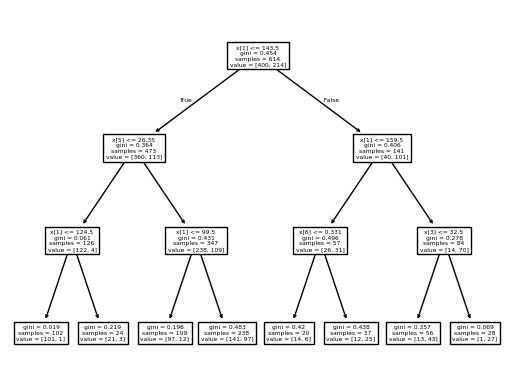

In [125]:
plot_tree(clf_gini)

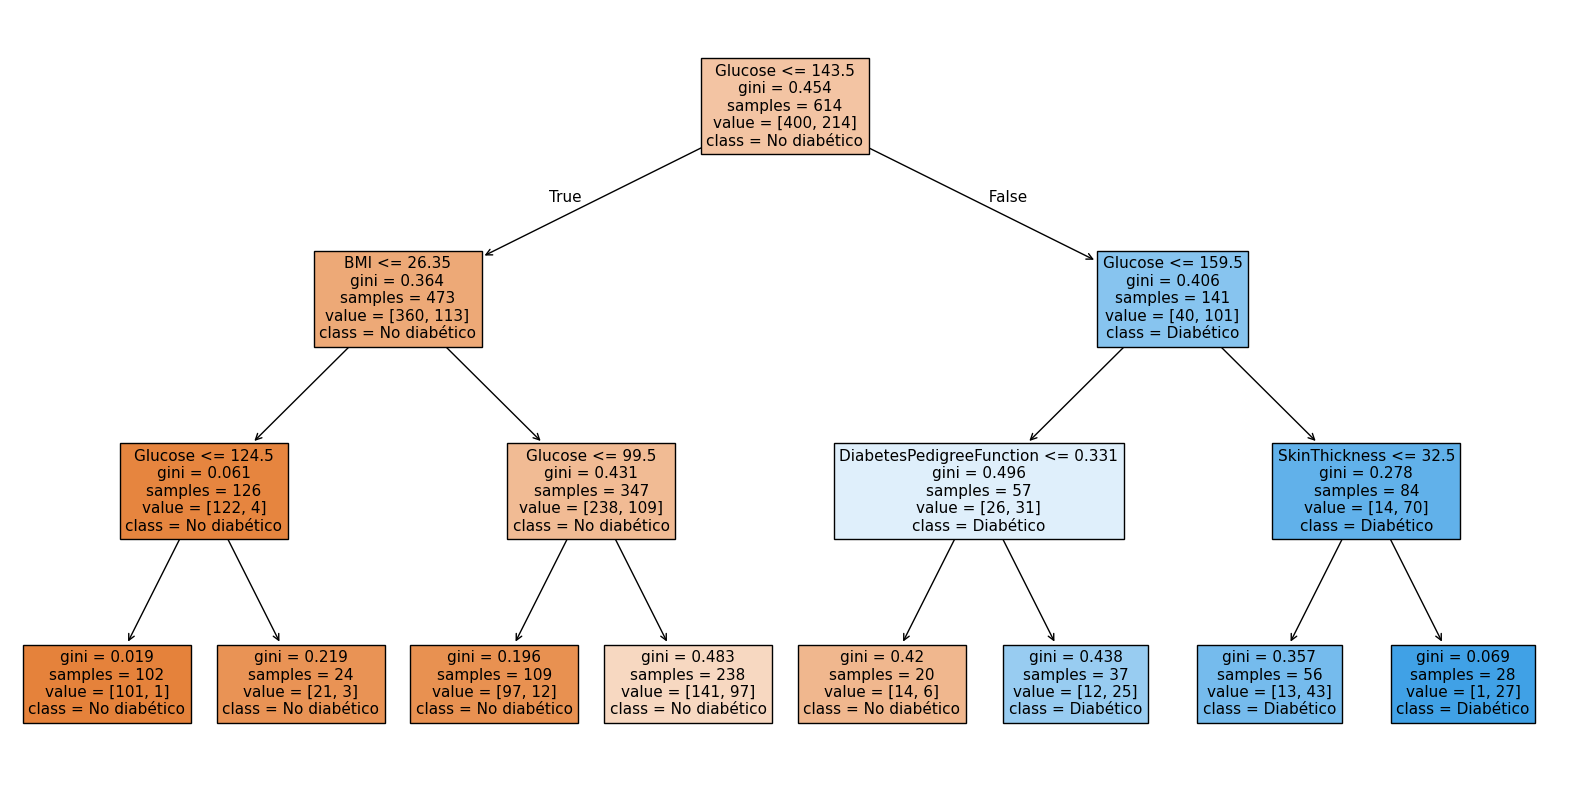

In [126]:

plt.figure(figsize = (20,10))
plot_tree( # Función que permite visualizar el árbol de decisión ajustado.
    clf_gini, # Objeto que representa el árbol de decisión entrenado.
    feature_names = X.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["No diabético","Diabético"], # Nombre de las clases que se están prediciendo.
    label = "all", # Etiqueta todas características de cada nodo.
    proportion = False, # Visualiza las cantidades de datos en cada nodo de decisión,
    filled=True, # Colorea los nodos
    fontsize=11, # Establece el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

#### Entropía

[Text(0.5, 0.875, 'x[1] <= 143.5\nentropy = 0.933\nsamples = 614\nvalue = [400, 214]'),
 Text(0.25, 0.625, 'x[5] <= 26.35\nentropy = 0.793\nsamples = 473\nvalue = [360, 113]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 106.5\nentropy = 0.203\nsamples = 126\nvalue = [122, 4]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.376\nsamples = 55\nvalue = [51, 4]'),
 Text(0.375, 0.375, 'x[1] <= 99.5\nentropy = 0.898\nsamples = 347\nvalue = [238, 109]'),
 Text(0.3125, 0.125, 'entropy = 0.5\nsamples = 109\nvalue = [97, 12]'),
 Text(0.4375, 0.125, 'entropy = 0.975\nsamples = 238\nvalue = [141, 97]'),
 Text(0.75, 0.625, 'x[1] <= 159.5\nentropy = 0.86\nsamples = 141\nvalue = [40, 101]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[6] <= 0.331\nentropy = 0.994\nsamples = 57\nvalue = [26, 31]'),
 Text(0.5625, 0.125, 'entropy = 0.881\nsamples = 20\nvalue = [14, 6]'),
 Text(0.6875, 0.125, 'entropy = 0.909\nsamples = 3

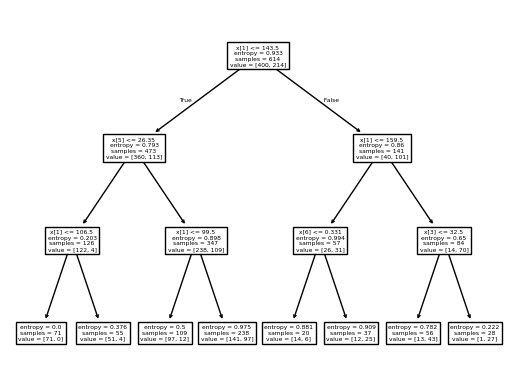

In [127]:
plot_tree(clf_entropy)

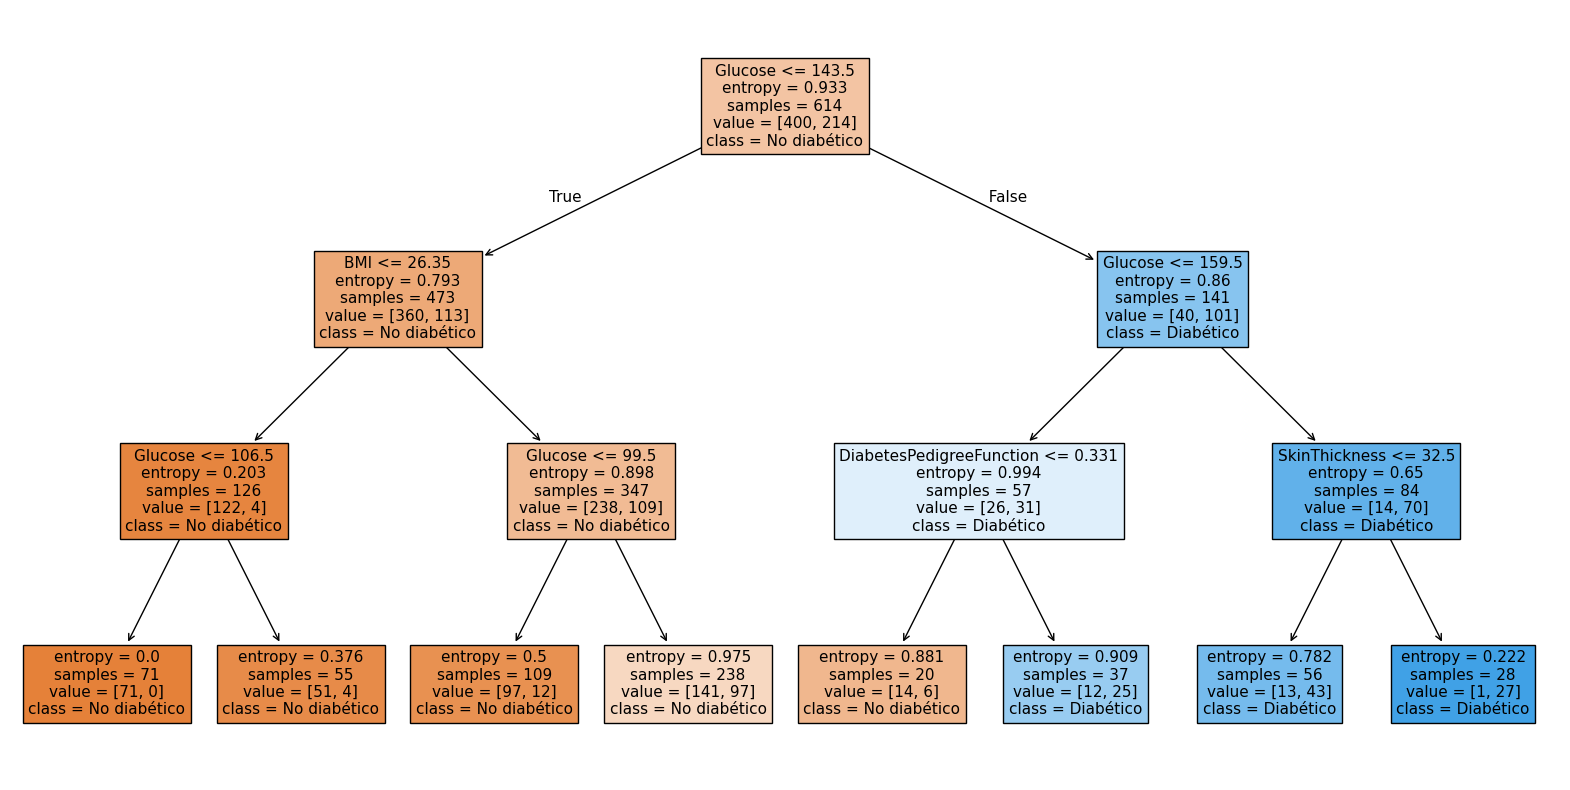

In [128]:
plt.figure(figsize = (20,10))
plot_tree( # Función que permite visualizar el árbol de decisión ajustado.
    clf_entropy, # Objeto que representa el árbol de decisión entrenado.
    feature_names = X.columns, # Nombres de las variables utilizadas para entrenar.
    class_names = ["No diabético","Diabético"], # Nombre de las clases que se están prediciendo.
    label = "all", # Etiqueta todas características de cada nodo.
    proportion = False, # Visualiza las cantidades de datos en cada nodo de decisión,
    filled=True, # Colorea los nodos
    fontsize=11, # Establece el tamaño de la letra del texto dentro de cada nodo.
)
plt.show()

In [129]:
X_train.shape

(614, 8)

In [130]:
print("Misma predicción:", np.array_equal(y_pred_gini, y_pred_entropy))


Misma predicción: True


-----

❓

¿Hubo variaciones al usar criterios distintos? ¿Cuál crees que fue la causa?

-----

✅ **Causa de resultados exactamente iguales**

Una de las razones puede ser que las variables predictoras son muy informativas.

A continuación se calculan algunas métricas para averiguar si las variables predictoras son muy informativas.

# ¿Por qué razón los resulatdos con `gini` y `entropy` son similares?

## Obtener la importancia de las variables

In [131]:
# Entrena un modelo
rf = RandomForestClassifier(random_state=29)
rf.fit(X_train, y_train)

# Importancia
importancias = rf.feature_importances_
features = X_train.columns
importancias_df = pd.DataFrame({'feature': features,
                                'importance': importancias}).sort_values(by='importance', ascending=False)


In [132]:
# Visualizar las importancias
importancias_df

,feature,importance
1,Glucose,0.244791
5,BMI,0.161670
7,Age,0.144245
6,DiabetesPedigreeFunction,0.123198
0,Pregnancies,0.088077
2,BloodPressure,0.086053
4,Insulin,0.079062
3,SkinThickness,0.072904


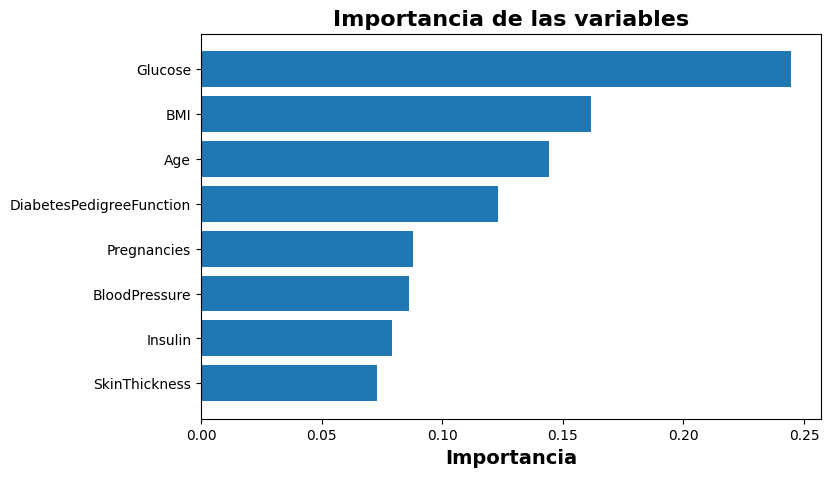

In [133]:
# Gráfico
plt.figure(figsize=(8,5))
plt.barh(importancias_df['feature'], importancias_df['importance'])
plt.gca().invert_yaxis()
plt.title("Importancia de las variables", fontsize=16, fontweight="bold")
plt.xlabel("Importancia", fontsize=14, fontweight="bold")
plt.show()

✅ **Interpretación**

Si una o dos variables tienen una importancia dominante, entonces probablemente son muy informativas.

## Información mutua

In [134]:
informacion_mutua = mutual_info_classif(X_train, y_train, random_state=29)
informacion_mutua_df = pd.DataFrame({'feature': X.columns, 'mutual_info': informacion_mutua}).sort_values(by='mutual_info', ascending=False)
informacion_mutua_df


,feature,mutual_info
1,Glucose,0.127378
5,BMI,0.070870
7,Age,0.067755
4,Insulin,0.050941
3,SkinThickness,0.012208
6,DiabetesPedigreeFunction,0.006488
0,Pregnancies,0.000440
2,BloodPressure,0.000000


✅ **Interpretación**

Valores más altos indican más dependencia entre la variable y el target (más informativa).

## Correlación con la variable objetivo

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: target, dtype: float64


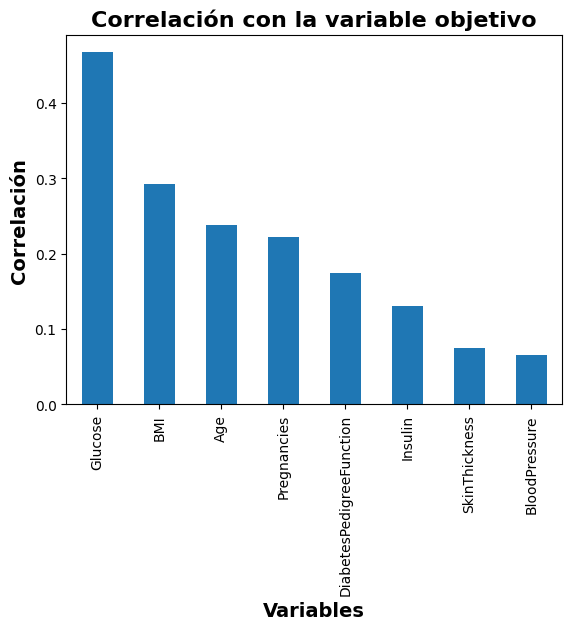

In [135]:
data_copia = X.copy()
data_copia['target'] = y
corrs = data_copia.corr(numeric_only=True)['target'].drop('target').sort_values(ascending=False)
print(corrs)

# Gráfico
ax = corrs.plot(kind='bar')

# Personalizar el título
ax.set_title('Correlación con la variable objetivo', fontsize=16, fontweight='bold')
ax.set_ylabel('Correlación', fontsize=14, fontweight="bold")
ax.set_xlabel('Variables', fontsize=14, fontweight="bold")
plt.show()


✅ **Interpretación**

Las variables `Glucose` y `BMI` muestran una correlación significativa con la variable objetivo, lo que refuerza su importancia en el modelo.

## Puntuaciones F (ANOVA)

In [136]:
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

score_df = pd.DataFrame({'feature': X.columns, 'f_score': scores}).sort_values(by='f_score', ascending=False)
score_df


,feature,f_score
1,Glucose,213.161752
5,BMI,71.772072
7,Age,46.140611
0,Pregnancies,39.670227
6,DiabetesPedigreeFunction,23.871300
4,Insulin,13.281108
3,SkinThickness,4.304381
2,BloodPressure,3.256950


✅ **Interpretación**

Las variables con puntuaciones F más altas, como `Glucose` y `BMI`, indican una diferencia significativa entre las clases, lo que las hace altamente informativas.

🧠 **Conclusión**

El análisis combinado de todas las métricas anteriores confirma que las variables `Glucose`, `BMI` y `Age` son altamente informativas para predecir la presencia de diabetes en este conjunto de datos. Esta fuerte influencia puede explicar por qué los árboles de decisión con criterios de Gini y Entropía producen resultados similares: ambos identifican rápidamente estas variables dominantes.